In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# El dataset a cargar contiene información de los paises

In [3]:
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df = pd.read_csv(url, sep=';')

In [6]:
df.head(3)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af


Verficar los datos basicos, o información básica, en los nombres de las columnas.

In [7]:
df.shape

(252, 19)

In [8]:
df.columns

Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [11]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


Verificar si existe correlación en las variables numéricas, con una categórica.

Con un coeficiente que esta entre $[-1 , 1]$
   * mientras mas se aproxima a cero, mas débil es la correlación.
   
   * mientras más se aproxima a 1 o -1, es mas fuerte la correlacion.
   
   * si separoxima a 1, la correlación es positiva.
   * si se aproxima a -1, la correlacion es negativa.
    
    

In [14]:
corr = df.set_index('alpha_3').corr()
corr

,area,geoname_id,numeric,population
area,1.000000,0.120399,-0.089264,0.412864
geoname_id,0.120399,1.000000,0.038707,-0.066105
numeric,-0.089264,0.038707,1.000000,-0.041140
population,0.412864,-0.066105,-0.041140,1.000000


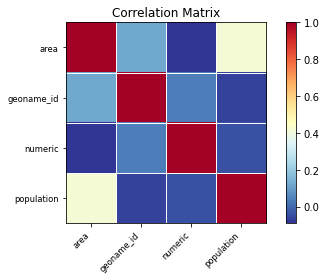

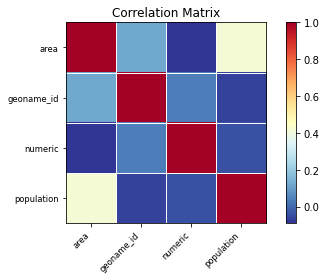

In [15]:
sm.graphics.plot_corr(corr, xnames = list(corr.columns))

In [17]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'

df_population = pd.read_csv(url)
df_population.head(4)

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966


In [25]:
df_SV = df_population[df_population['country'] == 'El Salvador']

In [26]:
df_SV

,country,year,population
468,El Salvador,1952,2042865
469,El Salvador,1957,2355805
470,El Salvador,1962,2747687
471,El Salvador,1967,3232927
472,El Salvador,1972,3790903
473,El Salvador,1977,4282586
474,El Salvador,1982,4474873
475,El Salvador,1987,4842194
476,El Salvador,1992,5274649
477,El Salvador,1997,5783439


<AxesSubplot:>

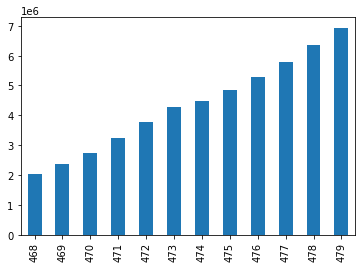

In [32]:
df_SV.drop(['country'], axis =1)['population'].plot(kind = 'bar')

In [35]:
df_GT = df_population[df_population['country'] == 'Guatemala']
df_GT

,country,year,population
600,Guatemala,1952,3146381
601,Guatemala,1957,3640876
602,Guatemala,1962,4208858
603,Guatemala,1967,4690773
604,Guatemala,1972,5149581
605,Guatemala,1977,5703430
606,Guatemala,1982,6395630
607,Guatemala,1987,7326406
608,Guatemala,1992,8486949
609,Guatemala,1997,9803875


Hacer una comparativa entre paises

In [37]:
year = df_SV['year'].unique()
year

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [38]:
pob_SV = df_SV['population'].values
pob_GT = df_GT['population'].values

In [42]:
comparar_pob = pd.DataFrame({
                        'El Salvador': pob_SV,
                        'Guatemala'  : pob_GT},
                         index = year
                        )
comparar_pob

,El Salvador,Guatemala
1952,2042865,3146381
1957,2355805,3640876
1962,2747687,4208858
1967,3232927,4690773
1972,3790903,5149581
1977,4282586,5703430
1982,4474873,6395630
1987,4842194,7326406
1992,5274649,8486949
1997,5783439,9803875


<AxesSubplot:title={'center':'Comparativa'}>

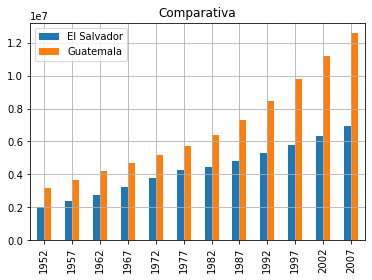

In [46]:
comparar_pob.plot(kind = 'bar', title = 'Comparativa', grid = True)

In [49]:
df_gt =  df_population[df_population['country'].str.contains('Guatemala')]

In [48]:
df_gt

,country,year,population
600,Guatemala,1952,3146381
601,Guatemala,1957,3640876
602,Guatemala,1962,4208858
603,Guatemala,1967,4690773
604,Guatemala,1972,5149581
605,Guatemala,1977,5703430
606,Guatemala,1982,6395630
607,Guatemala,1987,7326406
608,Guatemala,1992,8486949
609,Guatemala,1997,9803875


In [50]:
df

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,NaN,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,NaN,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,NaN,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,NaN,NaN,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,NaN,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


In [52]:
df_es_lang = df.replace(np.nan, '', regex = True)
df_es_lang

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,,,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,,,.af
3,AG,ATG,443.0,St. John's,,XCD,Dollar,,AC,3576396,en-AG,Antigua and Barbuda,,28,+1-268,86754,,,.ag
4,AI,AIA,102.0,The Valley,,XCD,Dollar,,AV,3573511,en-AI,Anguilla,,660,+1-264,13254,,,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,,,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


In [54]:
df_es_lang = df_es_lang[df_es_lang['languages'].str.contains('es')]
df_es_lang

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
49,CR,CRI,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do


## Tarea hacer lo mismo para ambos idiomas: 
    Construir un Dataframe para los de habla Inglesa, Portugues.

<AxesSubplot:xlabel='alpha_3'>

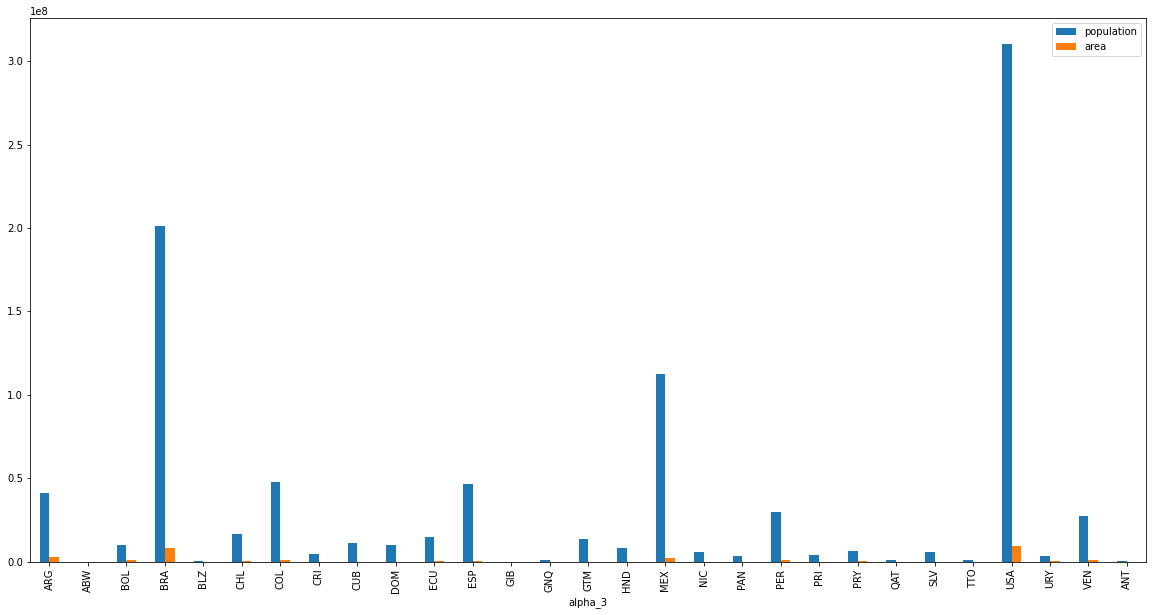

In [57]:
df_es_lang.set_index('alpha_3')[['population','area']].plot(kind = 'bar', figsize = (20,10))

In [58]:
anomalies = []
 
# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])
 
    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

In [59]:
find_anomalies(df_es_lang.set_index('alpha_3')[['population']])

-102872707.87855022
167589161.25786057


['BRA', 'USA']

In [62]:
# 30, 233

df_es_lang.drop([30,233], inplace= True)

KeyError: '[30, 233] not found in axis'

<AxesSubplot:xlabel='alpha_3'>

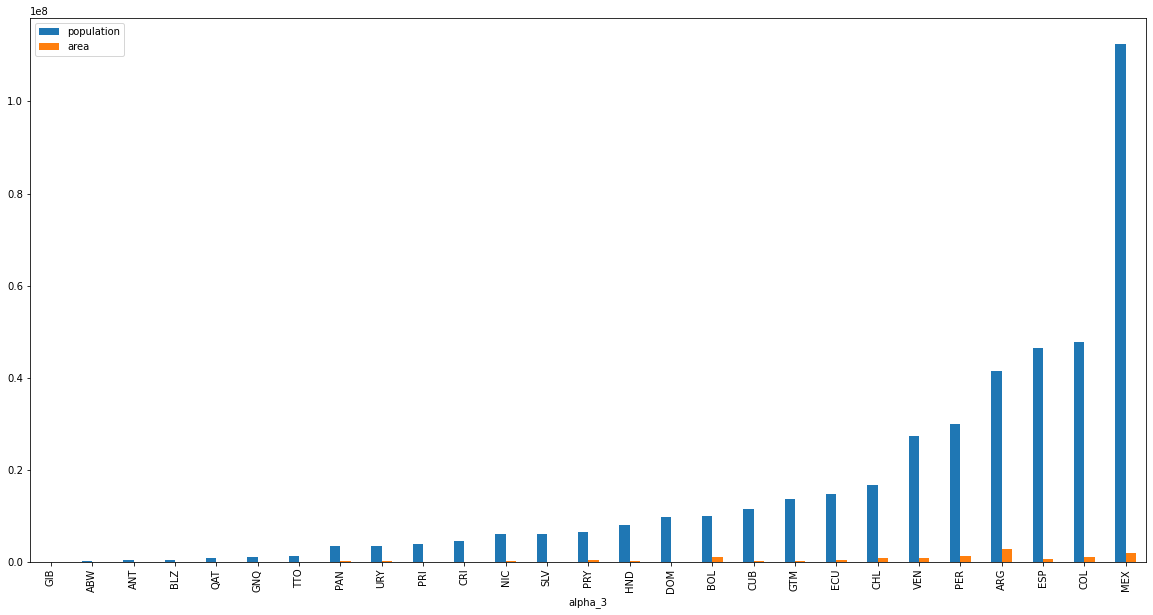

In [63]:
df_es_lang.set_index('alpha_3')[['population','area']].sort_values(['population']).plot(kind = 'bar', figsize = (20,10))

## Tarea: 
    Hacer un Dataframe por continente , agregar población y área , luego graficarlos.